## Synthetise and practice my knowledge about PCA on a fresh DS: [Amazon books](https://dasl.datadescription.com/datafile/amazon-books/)
### #Dataprep

### lets get to know eachother:

- what are the variables ? the individuals ?
- how many individuals / how many variables
- what are the continuous variable
- what are the categorical
- what is the distribution of each categories if there is

#### and more boring stuff
- is there null-ish values
- is there outliers
- blablabla

In [1]:
import numpy as np
import pandas as pd


X_df = pd.read_csv('./amazon-books.csv')

print(X_df.head())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard/ Paper  NumPages           Publisher  \
0       12.95          5.18           P     304.0         Adams Media   
1       15.00         10.20           P     273.0          Free Press   
2        1.50          1.50           P      96.0  Dover Publications   
3       15.99         10.87           P     672.0    Harper Perennial   
4       30.50         16.77           P     720.0               Knopf   

  Pub year     ISBN-10  Height  Width  Thick  Weight (oz)  Unnamed: 13  
0     2010  1605506249     7.8    5.5    0.8     

#### Variables

In [2]:
print('number of variables:', len(X_df.columns))
print('list of variable: ' )
for col in X_df.columns:
	print(col)

number of variables: 14
list of variable: 
Title
Author
List Price
Amazon Price
Hard/ Paper
NumPages
Publisher
Pub year
ISBN-10
Height
Width
Thick
Weight (oz)
Unnamed: 13


### individuals

In [3]:
print('number of individuals:', len(X_df))

def check_null_ish_values(df):
	null_counts = df.isnull().sum()  # NaN or None values
	empty_string_counts = (df == "").sum()  # Empty strings
	custom_nulls = ["unknown", "N/A", "na"]  # Add your specific "null-ish" values here
	custom_counts = {val: (df == val).sum() for val in custom_nulls}

	# Combine results into a DataFrame
	summary = pd.DataFrame({
		"Nulls": null_counts,
		"Empty Strings": empty_string_counts,
		**{f"Custom ({val})": count for val, count in custom_counts.items()}
	})
	
	return summary
print('Is there any null-ish value:')
nullish_summary = check_null_ish_values(X_df)
print(nullish_summary)

print('\n\ntotal number of null-ish values:', nullish_summary['Nulls'].sum())

number of individuals: 325
Is there any null-ish value:
              Nulls  Empty Strings  Custom (unknown)  Custom (N/A)  \
Title             0              0                 0             0   
Author            1              0                 0             0   
List Price        1              0                 0             0   
Amazon Price      0              0                 0             0   
Hard/ Paper       0              0                 0             0   
NumPages          2              0                 0             0   
Publisher         1              0                 0             0   
Pub year          1              0                 0             0   
ISBN-10           0              0                 0             0   
Height            4              0                 0             0   
Width             5              0                 0             0   
Thick             1              0                 0             0   
Weight (oz)       9              0

#### first we drop the garbage "unnamed: 13" column

In [4]:
X_df = X_df.drop(['Unnamed: 13'], axis=1)

In [5]:
nullish_summary = check_null_ish_values(X_df)
print('\n\ntotal number of null-ish values:', nullish_summary['Nulls'].sum())




total number of null-ish values: 25


#### 25 is better, how many rows it really represent ?

In [6]:
nan_values = X_df[X_df.isna().any(axis=1)]

In [7]:
print('how many rows contain null-ish values:', len(nan_values))

how many rows contain null-ish values: 15


In [8]:
nan_values


,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
8,A Dance With Dragons,"Martin RR, George",35.00,18.81,H,NaN,Bantam,2011,553801473,9.6,6.5,2.1,NaN
76,Fences,August Wislon,21.10,16.46,H,NaN,Perfection Leraning,1986,780707508,9.0,6.0,1.0,22.4
94,"Heroes of Olympus, The, Book Two: The Son of N...","Riordan, Rick",19.99,10.75,H,544.0,Hyperion Book CH,2011,1423140591,NaN,NaN,1.8,25.6
102,Ice bound,"Maryanne Vollers, Jerri Nielsen",14.95,5.98,P,377.0,NaN,NaN,786886994,8.3,5.3,1.0,12.8
107,Inheritance,"Paolini, Christopher",27.99,13.98,H,704.0,Knopf Books for Young Readers,2011,375856110,NaN,NaN,2.1,NaN
165,Prized,"O'Brien, Caragh M.",16.99,10.79,H,368.0,Roaring Brook Press,2011,1596435704,NaN,NaN,1.2,NaN
166,Psychology Ninth Edition in Modules,David G. Myers,98.95,98.95,H,778.0,Worth Publishers,2009,1429238240,11.3,9.5,1.5,NaN
168,Rainbow Green Live-Food Cuisine,Cousens,19.73,15.68,H,544.0,North Atlantic Books,2003,1556434650,9.0,7.0,1.0,NaN
169,"Raw Food, Real World: 100 Recipes to Get the Glow",Kenny & Meingallis,37.50,25.00,H,384.0,William Morrow Cookbooks,2005,60793554,9.1,7.3,1.4,NaN
184,Security Analysis: Sixth Edition,Benjamin Graham,75.00,39.45,H,700.0,ÊMcGraw-Hil,2008,71592539,9.5,6.5,NaN,NaN


### I've read that book so lets add it, for the rest it represent approximately 4% of the DS so let just drop it


In [9]:
X_df.at[102, 'Pub year'] = 2002
X_df.at[102, 'Publisher'] = 'Miramax'
nan_values = X_df[X_df.isna().any(axis=1)]


In [10]:
index_list = nan_values.index.tolist()
index_list

[8, 76, 94, 107, 165, 166, 168, 169, 184, 204, 210, 259, 272, 298]

In [11]:
X_df = X_df.drop(index_list, axis=0)

#### we check now that our nan stats are clean


In [12]:
print('number of individuals:', len(X_df))
null_stats = check_null_ish_values(X_df)
print(null_stats.any().any())

number of individuals: 311
False


#### How about the dtypes of our variables:
- continuous variable are in float except for the year
- for the rest it is object type, lets see if we can make it string

In [13]:
print(X_df.dtypes)

Title            object
Author           object
List Price      float64
Amazon Price    float64
Hard/ Paper      object
NumPages        float64
Publisher        object
Pub year         object
ISBN-10          object
Height          float64
Width           float64
Thick           float64
Weight (oz)     float64
dtype: object


In [14]:
# X_df['Pub year'] = X_df['Pub year'].astype(int)
# this command inform me that some lines are not really dates
def is_convertible_to_int(value):
	try:
		int(value)
		return True
	except (ValueError, TypeError):
		return False

index_list = []
for index, value in X_df['Pub year'].items():
	if (not is_convertible_to_int(value)):
		index_list.append(index)
index_list

[244, 251, 261, 275]

In [15]:
# we have indeed a little pb the publication date has been shifted to the ISBN code, lets fix both
X_df.loc[index_list]

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
244,The Great Gatsby,F. Scott Fitzgerald,15.00,8.92,P,180.0,Scribner,Reissue edition,1999,743273567.0,7.9,5.2,0.5
251,The Hunger Games,Suzanne Collins,17.99,10.21,H,384.0,Scholastic Press,1st Edition,2008,439023483.0,8.7,5.5,1.2
261,The Last Summer Of The Death Warriors,Francisco Stork,10.65,13.13,H,352.0,Arthur A. Levine Books,1 edition,2010,545151333.0,8.3,6.4,1.2
275,The perks of Being a Wallflower,Stephen Chbosky,14.00,8.22,P,213.0,MTV Books,origional edition,1999,671027344.0,7.1,5.1,0.5


In [16]:
pub_years = [1999, 2008, 2010, 1999]
ISBN = ["743273567", "439023483", "545151333", "671027344"]
Height = [7.9, 8.7, 8.3, 7.1]
Width = [5.2, 5.5, 6.4, 5.1]
Thick = [0.5, 1.2, 1.2, 0.5]
Weight = [4, 16, 15.2, 7.2] 

for i, idx in enumerate(index_list):
	X_df.at[idx, 'Pub year'] = pub_years[i]
	X_df.at[idx, 'ISBN-10'] = ISBN[i]
	X_df.at[idx, 'Height'] = Height[i]
	X_df.at[idx, 'Width'] = Width[i]
	X_df.at[idx, 'Thick'] = Thick[i]
	X_df.at[idx, 'Weight (oz)'] = Weight[i]
	

In [17]:
X_df['Pub year'] = X_df['Pub year'].astype(int)

#### Finally lets simplify the columns names and re-index consistently ou DS and thats enough for the boring stuff

In [18]:

X_df = X_df.rename(columns={'Title': 'title'})
X_df = X_df.rename(columns={'Author': 'author'})
X_df = X_df.rename(columns={'List Price': 'listPrice'})
X_df = X_df.rename(columns={'Amazon Price': 'amazonPrice'})
X_df = X_df.rename(columns={'Hard/ Paper': 'cover'})
X_df = X_df.rename(columns={'NumPages': 'npages'})
X_df = X_df.rename(columns={'Publisher': 'publisher'})
X_df = X_df.rename(columns={'Pub year': 'year'})
X_df = X_df.rename(columns={'ISBN-10': 'isbn'})
X_df = X_df.rename(columns={'Height': 'height'})
X_df = X_df.rename(columns={'Width': 'width'})
X_df = X_df.rename(columns={'Thick': 'thick'})
X_df = X_df.rename(columns={'Weight (oz)': 'weight'})

X_df = X_df.reset_index(drop=True)

In [19]:
X_df.index

RangeIndex(start=0, stop=311, step=1)

In [20]:
X_df.head()

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,width,thick,weight
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,5.2,1.4,22.4


In [21]:
X_df.to_csv('./amazon-books-clean.csv')

#### Now some actual stats:
- categorical / continuous variables
- min / max
- distributions
- ...

In [22]:
X_df = pd.read_csv('./amazon-books-clean.csv', index_col=0)

In [23]:
X_df.head()

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,width,thick,weight
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,5.2,1.4,22.4


In [24]:
print(f'we have {len(X_df)} individuals')
print(f'we have {len(X_df.columns)} variables')
print(X_df.dtypes)


we have 311 individuals
we have 13 variables
title           object
author          object
listPrice      float64
amazonPrice    float64
cover           object
npages         float64
publisher       object
year             int64
isbn            object
height         float64
width          float64
thick          float64
weight         float64
dtype: object


##### So we have 8 continuous variables
- listPrice i.e the recommended price by the publisher
- amazonPrice i.e the price on amazon website
- npages i.e the number of page in the book
- year i.e the year of publication
- then the specific metrics of a book:
		- height
		- width
		- thickness
		- weight

my intuiton is that the overalls correlations of the continuous variable sould be positives, in generale, more a book is heavy, he has better chance to be thick tall or large, which give better chance to be expensive book. many other parameters can come in.
- a book that is thin but has wide dimension could be costly because it mean book with drawings and nicely printed
- same for a heavy book that have small dimension: better paper quality, hard cover ...



In [25]:
def categorical_variable_summary(df, col_name):
	lst = []
	for col in col_name:
		lst.append(df[col].nunique())

	summary = pd.DataFrame({
		"unique": lst
	}, index=col_name)

	return summary

sum = categorical_variable_summary(X_df, ["title", "author", "cover", "publisher", "isbn", 'year'])

print(sum)

           unique
title         301
author        244
cover           2
publisher     152
isbn          308
year           37


##### A few notes on the 'categorical' variables:
1) we have 10 doublons in the books but it might be differents editions
2) we have a few authors that have multiple book in the list
3) cover is separated in two : hard vs soft, we hope it is eavenly distributed
4) publisher have an approximate average of two books each thats nice
5) isbn as expected is allmost size of the DS since it is unique ID but we have some book doublons

In [26]:
def group_summary(df, col):
	grouped = df.groupby(col).size()
	grouped = grouped.reset_index(name='count')
	return grouped

In [27]:
# dont take rush conslusion it might be differents editions of the same book in wich case it is still interesting to compare
titles = group_summary(X_df, 'title')
#print(titles[titles['count']>1])
lst = [stuff for stuff in titles[titles['count']>1]['title']]
X_df[X_df['title'].isin(lst)]

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,width,thick,weight
26,Adventures of Huckleberry Finn,Twain,7.95,7.95,H,336.0,Barnes & Noble Classics,2004,159308157,8.7,6.3,1.1,16.0
27,Adventures of Huckleberry Finn,Mark Twain,14.95,14.95,P,276.0,CreateSpace,2011,146352719,7.8,5.1,1.0,16.0
48,Catch-22,Jospeh Heller,24.00,16.32,H,624.0,Everyman's Library,1995,679437223,8.4,5.3,1.4,22.4
49,Catch-22,Joseph Heller,16.00,9.07,P,544.0,Simon and Schuster,2011,1451626657,8.4,5.4,1.3,19.2
59,Cutting for Stone,Verghese,15.95,7.97,P,667.0,Vintage,2010,375714367,8.0,5.2,1.2,17.6
60,Cutting for Stone,Abraham Verghese,15.95,7.97,P,667.0,Vintage,2010,375714367,8.0,5.2,1.2,17.6
107,Invisible Man,Ralph Ellison,15.95,10.22,P,608.0,Vintage,1995,679732764,8.0,5.2,1.1,17.6
108,Invisible Man,Ellison,21.00,13.43,H,624.0,Modern Library,1995,679601392,7.8,4.8,1.8,25.6
121,Lord of the Flies,William Golding,25.00,16.50,H,336.0,Perigee Trade,2003,399529209,8.4,5.4,1.2,16.0
122,Lord of the Flies,William Golding,9.99,9.99,P,208.0,Perigee Books,1959,399501487,7.2,4.2,0.6,4.0


In [28]:
# 41 authors tat have multiple books in the list, it is not enough to make categories
author = group_summary(X_df, 'author')
print(author[author['count']>1])


                  author  count
5            Alice Munro      2
14    Barbara W. Tuchman      2
15           Ben Mezrich      3
21                 Brown      2
22       Bruce Ballenger      3
33                Chopin      2
34           Christensen      3
37               Collins      3
50               Dickens      2
54               Drucker      3
72   F. Scott Fitzgerald      2
84      Geraldine Brooks      2
86               Grisham      2
90                Ha Jin      3
92             Hawthorne      2
103      James Patterson      3
113         Jodi Picoult      7
117       John Steinbeck      3
131             Kawabata      2
132             Kawasaki      2
135        Kurt Vonnegut      2
136               Lahiri      2
138    Laura Hillenbrand      2
142                Lewis      4
146   Lorraine Hansberry      2
152           Mark Twain      2
171             Murakami      4
178             Orringer      2
193        Robert Leckie      2
199          S.E. Hinton      3
203     

In [29]:
cover = group_summary(X_df, 'cover')
print((cover[cover['count']>1]))
dist = [va * 100 for va in (cover['count'] / 311)]
print(f'distribution: H: {round(dist[0], 2)}% P: {round(dist[1], 2)}% ')

  cover  count
0     H     78
1     P    233
distribution: H: 25.08% P: 74.92% 


In [30]:
publisher = group_summary(X_df, 'publisher')
print('total number of publisher:', len(publisher['count']))
print('total number of publisher that has nore than 1 book in the DS:', len(publisher[publisher['count'] > 1]))
print('average of books per publisher:', publisher['count'].sum() / len(publisher['count']))
print('average for the publisher that have more than one book:', publisher[publisher['count'] > 1]['count'].sum()/ len(publisher[publisher['count'] > 1]) )

total number of publisher: 152
total number of publisher that has nore than 1 book in the DS: 47
average of books per publisher: 2.0460526315789473
average for the publisher that have more than one book: 4.382978723404255


In [31]:
years = group_summary(X_df, 'year')
years.sort_values(by=['count'])

,year,count
0,1936,1
1,1955,1
2,1957,1
3,1959,1
6,1965,1
7,1967,1
8,1976,1
9,1979,1
11,1985,1
4,1963,2


#### Question:
the publishers are not evenly distributed, only 47 publisher have more than one book, representing 206 books which is approximately 1/3 of the DS
- how to interpret this statistique ? 
- more broadly how to take into account the difference in distribution in my categories ?

### Selecting the active variables:
- the active variable are in most case a subset of continuous variables that form an all
- our dataset offer 8 continuous variables that can be separeted in two groups:
	- the prices (economic variable) : listprice, amazonprice, year
	- the physical attribute: height width weight thick numpages

note: year is an interesting variable because it can be treated both as continuous and categorical variable.
intuitively it make sense to represent a book based on its physical characteristic in order to produce factorial axis that allows us to see distances and relation between them
we could then add prices and years as extra variable to measure correlations

In [32]:
from summaries import continuous_variable_summary 
continuous_sum = continuous_variable_summary(X_df, ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'])
print(continuous_sum)

                   mean  median      variance     std_dev    min     max
listPrice     17.924920    15.0    176.010279   13.266887   1.50  139.95
amazonPrice   12.566399    10.2    133.777874   11.566239   0.77  139.95
npages       330.726688   320.0  25211.992802  158.782848  24.00  896.00
height         8.131511     8.1      0.752617    0.867535   5.10   12.10
width          5.552733     5.3      0.712630    0.844174   4.10    9.30
thick          0.890354     0.8      0.126036    0.355015   0.10    2.00
weight        12.428939    11.2     43.715934    6.611803   1.20   35.20


the mean and median for all the variables are close to eachother which point toward normally distributed data. 
both prices average are a bit higher then their respective median which indicate a slight biais toward very expensive books
in average amazon always offers cheaper book than the recommended price.
all our variable seem to follow a nice normal distribution, with a std close to the mean for the price.

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histogram_with_normal(values, mean, std):
	plt.hist(values, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')

	# Create range for normal distribution
	xmin, xmax = plt.xlim()
	x = np.linspace(xmin, xmax, 100)
	p = norm.pdf(x, mean, std)

	# Plot normal distribution
	plt.plot(x, p, 'k', linewidth=2, label='Normal distribution')

	# Add labels and legend
	plt.title('Histogram with Normal Distribution')
	plt.xlabel('Value')
	plt.ylabel('Density')
	plt.legend()

	# Show plot
	plt.show()
	

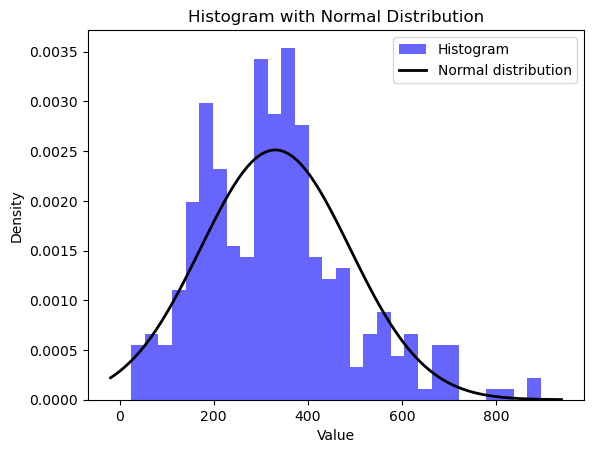

In [34]:
mean = continuous_sum.loc['npages']['mean']
std = continuous_sum.loc['npages']['std_dev']
values = X_df['npages']
plot_histogram_with_normal(values, mean, std)


In [35]:
def plot_histograms_grid(variables, continuous_summary, data, grid_shape=(3, 3)):
	"""
	Plots histograms with normal distribution overlays for a list of variables in a grid.

	Parameters:
		variables (list): List of variable names to plot.
		continuous_summary (pd.DataFrame): DataFrame with mean and std_dev for each variable.
		data (pd.DataFrame): DataFrame containing the raw data values.
		grid_shape (tuple): Shape of the grid for subplots (rows, columns).
	"""
	n_vars = len(variables)
	fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(15, 10))
	axes = axes.flatten()  # Flatten to iterate easily
	for i, var in enumerate(variables):
		if i < n_vars:
			mean = continuous_summary.loc[var, 'mean']
			std = continuous_summary.loc[var, 'std_dev']
			values = data[var]

			# Plot histogram
			axes[i].hist(values, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')

			# Overlay normal distribution
			xmin, xmax = axes[i].get_xlim()
			x = np.linspace(xmin, xmax, 100)
			p = norm.pdf(x, mean, std)
			axes[i].plot(x, p, 'k', linewidth=2, label='Normal distribution')

			# Add titles and labels
			axes[i].set_title(f'{var} Histogram')
			axes[i].set_xlabel('Value')
			axes[i].set_ylabel('Density')
			axes[i].legend()
		else:
			# Turn off extra subplots
			axes[i].axis('off')
	
	# Adjust layout
	plt.tight_layout()
	plt.show()

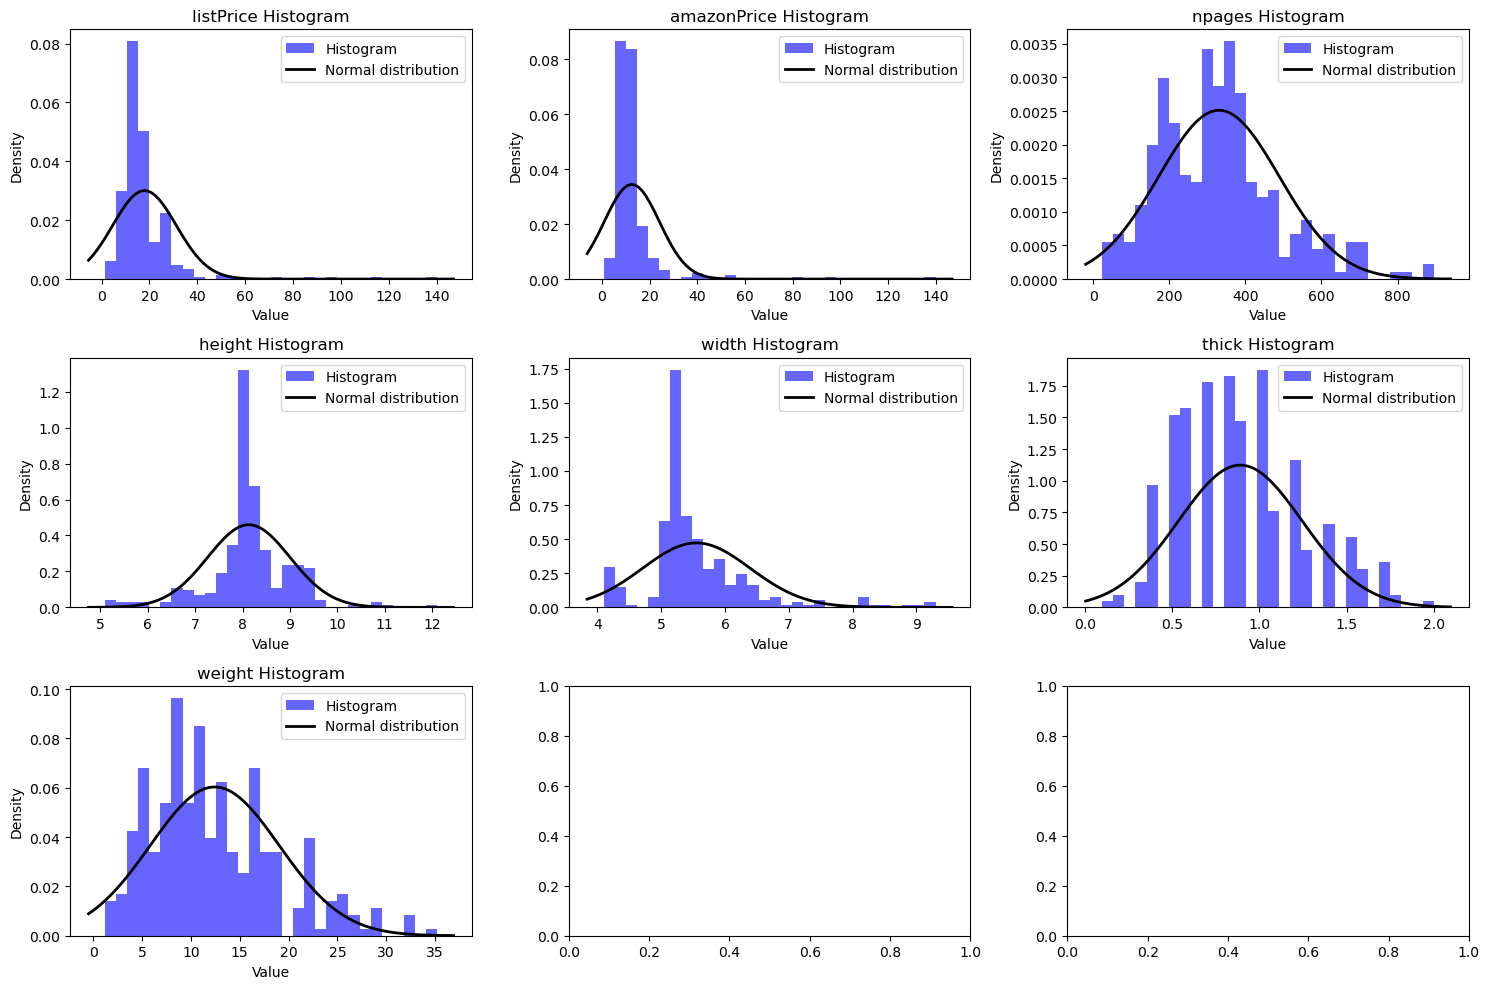

In [36]:
plot_histograms_grid(['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'], continuous_sum, X_df)

### Everything follow a normal distribution, surprisingly, prices follows a thiner shape than I thought regarding the physical caracteristique of the books that are more flattened 

In [37]:
cols = ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight']
X_norm = pd.DataFrame(columns=cols)
for cl in cols:
	mean = continuous_sum.loc[cl]['mean']
	std = continuous_sum.loc[cl]['std_dev']
	X_norm[cl] = (X_df[cl] - mean) / std

sum = continuous_variable_summary(X_norm, cols)

X_norm.to_csv('./amazon-books-continuous-standardised.csv')


In [38]:
X = np.array(X_df)
Z = np.array(X_norm)
print(Z.shape[0], X.shape[0])
corr_mat = np.matmul(Z.T, Z) / Z.shape[0]

corr_mat.shape

311 311


(7, 7)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(corr_matrix, column_names=None):
    plt.figure(figsize=(10, 8))
    if column_names:
        xticklabels = column_names
        yticklabels = column_names
    else:
        xticklabels = corr_matrix.columns
        yticklabels = corr_matrix.columns

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                cbar=True, square=True, linewidths=0.5, vmin=-1, vmax=1,
                xticklabels=xticklabels, yticklabels=yticklabels)
    
    plt.title('Correlation Matrix Heatmap')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()


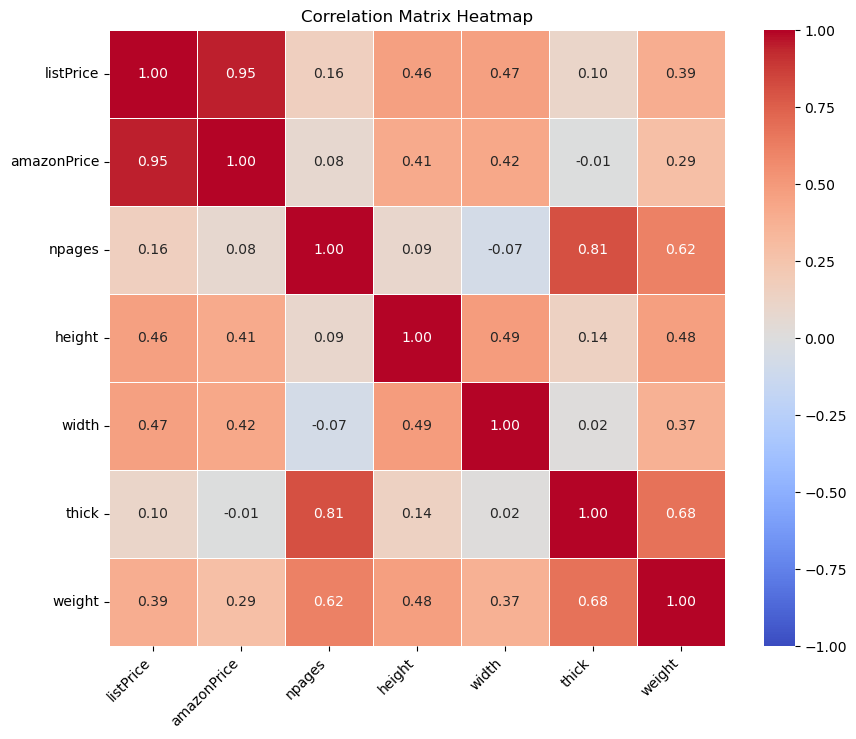

In [40]:
plot_correlation_heatmap(corr_mat, cols)

### without the prices

In [41]:
X = X_df.drop(['listPrice', 'amazonPrice'], axis=1)
X = np.array(X)

Z = X_norm.drop(['listPrice', 'amazonPrice'], axis=1)
Z = np.array(Z)
print(Z.shape[0])
corr_mat = np.matmul(Z.T, Z) / Z.shape[0]

311


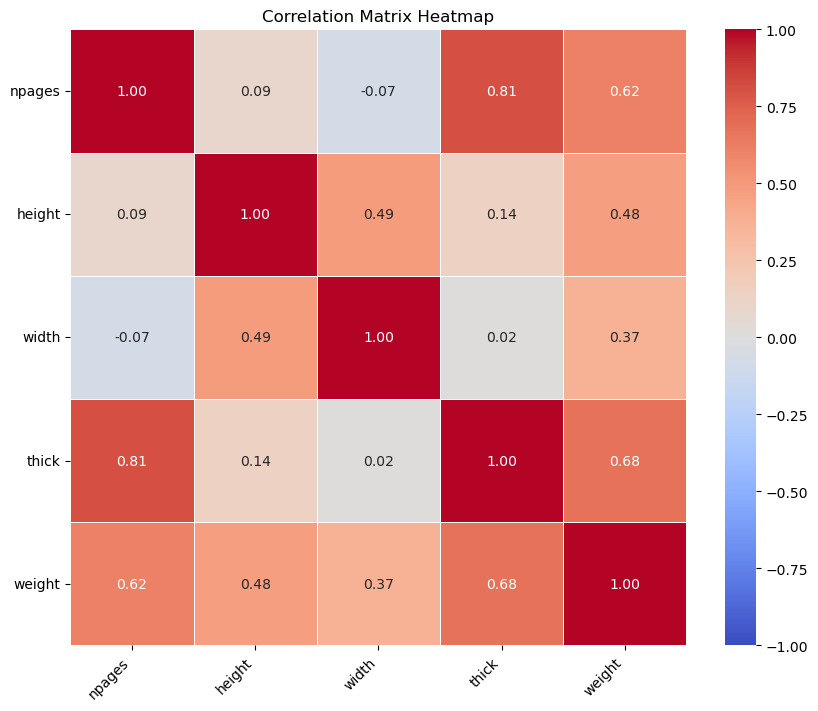

In [42]:
plot_correlation_heatmap(corr_mat, ['npages', 'height', 'width', 'thick', 'weight'])
